<a href="https://colab.research.google.com/github/muniappabalaji/TimeSeries/blob/main/Great_Learning_TSA_August2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the data and libraries
2. Exploratory Data Analysis
3. Stationarize the data
4. Apply VAR Model
5. Interpret the dianostics

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

Load the data

In [6]:
m2sl_df = pd.read_csv('/content/M2SLMoneyStock.csv')
pce_df = pd.read_csv('/content/PCEPersonalSpending.csv')

In [7]:
m2sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Money   252 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [8]:
pce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      252 non-null    object 
 1   Spending  252 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


Merged DF

In [9]:
merged_df = pd.merge(m2sl_df, pce_df, on='Date')

In [10]:
display(merged_df.head())
display(merged_df.tail())

,Date,Money,Spending
0,1/1/1995,3492.4,4851.2
1,2/1/1995,3489.9,4850.8
2,3/1/1995,3491.1,4885.4
3,4/1/1995,3499.2,4890.2
4,5/1/1995,3524.2,4933.1


,Date,Money,Spending
247,8/1/2015,12096.8,12394.0
248,9/1/2015,12153.8,12392.8
249,10/1/2015,12187.7,12416.1
250,11/1/2015,12277.4,12450.1
251,12/1/2015,12335.9,12469.1


Plot the data

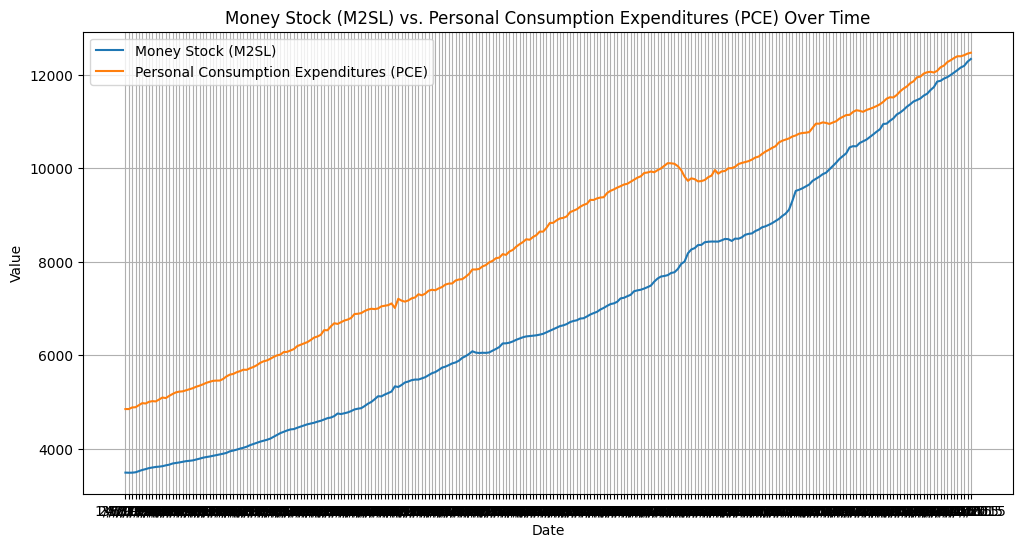

In [11]:
# Plotting both series together
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Money'], label='Money Stock (M2SL)')
plt.plot(merged_df['Date'], merged_df['Spending'], label='Personal Consumption Expenditures (PCE)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Money Stock (M2SL) vs. Personal Consumption Expenditures (PCE) Over Time')
plt.legend()
plt.grid(True)
plt.show()

Evaluating the data

In [12]:
from scipy import stats
midpoint = len(merged_df)//2

In [13]:
first_half = merged_df.iloc[0:midpoint].copy()
second_half = merged_df.iloc[midpoint:].copy()

In [14]:
# Convert 'Date' to datetime objects for plotting
first_half['Date'] = pd.to_datetime(first_half['Date'])
second_half['Date'] = pd.to_datetime(second_half['Date'])

Boxplot to compare the 2 halves

/tmp/ipython-input-1214938445.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([first_half['Money'], second_half['Money']], labels=['First Half', 'Second Half'])
/tmp/ipython-input-1214938445.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([first_half['Spending'], second_half['Spending']], labels=['First Half', 'Second Half'])


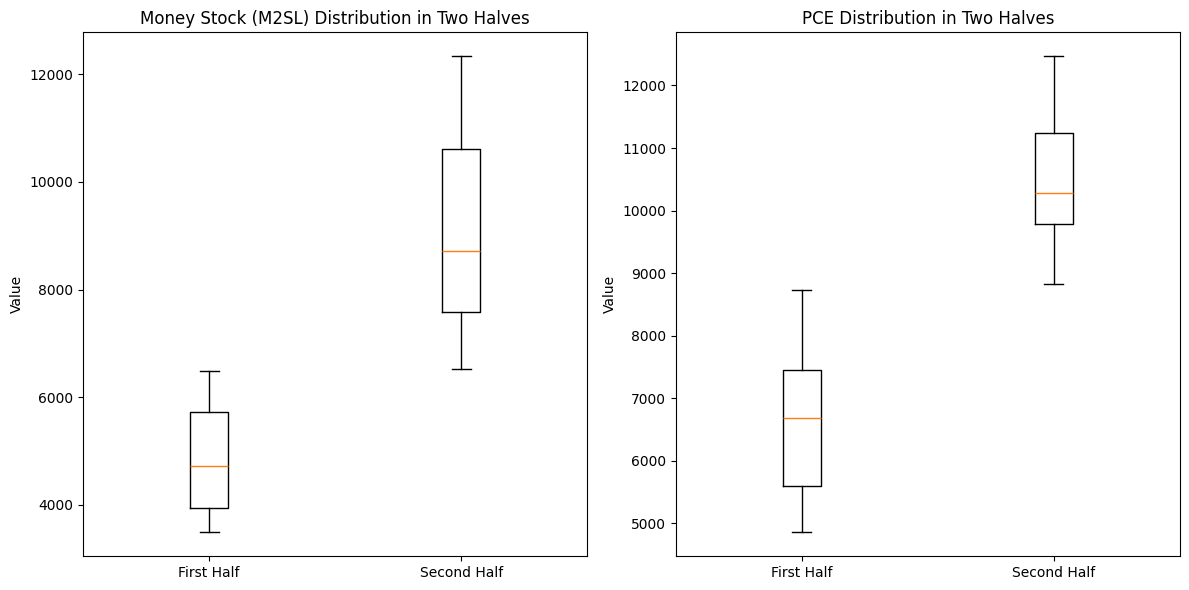

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot([first_half['Money'], second_half['Money']], labels=['First Half', 'Second Half'])
plt.title('Money Stock (M2SL) Distribution in Two Halves')
plt.ylabel('Value')

plt.subplot(1, 2, 2)
plt.boxplot([first_half['Spending'], second_half['Spending']], labels=['First Half', 'Second Half'])
plt.title('PCE Distribution in Two Halves')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

T test
* H0: Mu1 = Mu2
* H1: Mu1 =! Mu2

In [16]:
ttest_spending = stats.ttest_ind(first_half['Spending'], second_half['Spending'])
print(f"T-test for Personal Consumption Expenditures (PCE) - p-value: {ttest_spending.pvalue:.4f}")


T-test for Personal Consumption Expenditures (PCE) - p-value: 0.0000


ADF Test

* Ho: Time Series non stationary
* H1: Time Series is stationary

In [17]:
adffuller_test = adfuller(merged_df['Spending'])
print(f"ADF Test for Personal Consumption Expenditures (PCE) - p-value: {adffuller_test[1]:.4f}")

ADF Test for Personal Consumption Expenditures (PCE) - p-value: 0.9693


In [18]:
adffuller_test = adfuller(merged_df['Money'])
print(f"ADF Test for Money - p-value: {adffuller_test[1]:.4f}")

ADF Test for Money - p-value: 1.0000


Stationarize the data

In [20]:
merged_df['Money_Diff_1'] = merged_df['Money'].diff()

In [23]:
adffuller_test = adfuller(merged_df['Money_Diff_1'].dropna())
print(f"ADF Test for Money - p-value: {adffuller_test[1]:.4f}")

ADF Test for Money - p-value: 0.2620


In [25]:
merged_df['Money_Diff_2'] = merged_df['Money_Diff_1'].diff()

In [26]:
adffuller_test = adfuller(merged_df['Money_Diff_2'].dropna())
print(f"ADF Test for Money - p-value: {adffuller_test[1]:.4f}")

ADF Test for Money - p-value: 0.0000
